In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
airlines_=pd.read_csv("\\Users\\piyus\\Documents\\EastWestAirline.csv")

In [3]:
airlines_.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airlines_.shape

(3999, 12)

In [5]:
airlines=airlines_.iloc[:,1:]

In [6]:
airlines.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [7]:
airlines.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit(airlines.iloc[:,0:])
airlines.iloc[:,0:]=scale.transform(airlines.iloc[:,0:])
airlines.head()


C:\Users\piyus\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [9]:
#elbow method to decide K 
k_rng=range(1,11)
sse= []
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(airlines)
    sse.append(km.inertia_)

In [10]:
sse

[1830.793212858415,
 823.6756984125232,
 625.1684881570748,
 436.70885761932624,
 348.9433217254147,
 315.3146851898979,
 287.89491837037474,
 263.045810708707,
 243.91556603668823,
 226.11005531865]

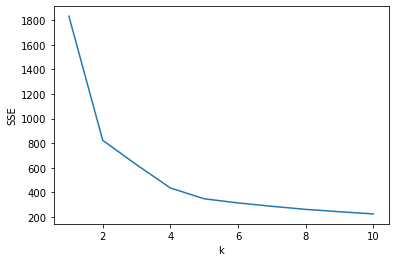

In [11]:
from matplotlib import pyplot as plt
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

# KMeans Clustering 

In [12]:
model=KMeans(n_clusters=2)
pred=model.fit_predict(airlines)
pred

array([0, 0, 0, ..., 1, 0, 0])

In [13]:
airlines_=airlines_.drop('ID#',axis=1)

In [14]:
airlines_['Cluster']=pred

In [15]:
airlines_.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [16]:
airlines_.groupby(airlines_.Cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
0,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
1,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0


# DBSCAN

In [17]:
model_=DBSCAN(eps=0.3,min_samples=13)
pred_=model_.fit_predict(airlines_)
pred_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [18]:
airlines_['clust']=pred_

In [19]:
airline=airlines_.drop('Cluster',axis=1)

In [20]:
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,-1
1,19244,0,1,1,1,215,2,0,0,6968,0,-1
2,41354,0,1,1,1,4123,4,0,0,7034,0,-1
3,14776,0,1,1,1,500,1,0,0,6952,0,-1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1


In [21]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

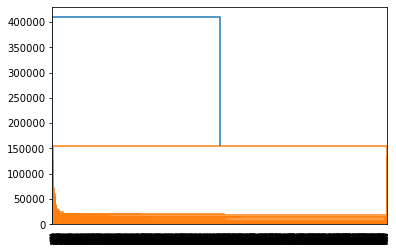

In [22]:
#creating dendrogram
dendrogram=sch.dendrogram(sch.linkage(airlines_,method='single'))

In [23]:
HC=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')
y_hc=HC.fit_predict(airlines_)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])
clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0
